# Basic Model

## Prepare training data

In [1]:
import pandas as pd
import sys,os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
image_path = "D:/Projects/CK_plus/datasets/images"
label_path = "D:/Projects/CK_plus/datasets/Emotion"
image_target_path = "D:/Projects/CK_plus/datasets/target_images"

# image_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/cohn-kanade-images"
# label_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/Emotion"
# image_target_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/images"

In [8]:
img_data = pd.read_csv("CSV/img_data.csv")
img_data = img_data[['img_id','em_id','emotion','img_num']]
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000007,S005_001_00000011,3,11
1,S005_001_00000008,S005_001_00000011,3,11
2,S005_001_00000009,S005_001_00000011,3,11
3,S005_001_00000010,S005_001_00000011,3,11
4,S005_001_00000011,S005_001_00000011,3,11


In [9]:
img_data.shape

(1635, 4)

In [6]:
# Anger,Contempt, Disgust, Fear, Happy, Sadness and Surprise.
emotions_dict = {1:"An",2:"Con",3:"Di",4:"Fe",5:"Ha",6:"Sa",7:"Sur"}
emotions_dict

{1: 'An', 2: 'Con', 3: 'Di', 4: 'Fe', 5: 'Ha', 6: 'Sa', 7: 'Sur'}

In [7]:
img_data['emotion']=img_data.emotion.apply(lambda em:emotions_dict[em])
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000007,S005_001_00000011,Di,11
1,S005_001_00000008,S005_001_00000011,Di,11
2,S005_001_00000009,S005_001_00000011,Di,11
3,S005_001_00000010,S005_001_00000011,Di,11
4,S005_001_00000011,S005_001_00000011,Di,11


In [8]:

img_data['name']=img_data.img_id.apply(lambda id: id+".png")
img_data.head()

,img_id,em_id,emotion,img_num,name
0,S005_001_00000007,S005_001_00000011,Di,11,S005_001_00000007.png
1,S005_001_00000008,S005_001_00000011,Di,11,S005_001_00000008.png
2,S005_001_00000009,S005_001_00000011,Di,11,S005_001_00000009.png
3,S005_001_00000010,S005_001_00000011,Di,11,S005_001_00000010.png
4,S005_001_00000011,S005_001_00000011,Di,11,S005_001_00000011.png


In [9]:
train_index = np.random.rand(len(img_data)) < 0.8
train_set = img_data[train_index].copy()
val_set = img_data[~train_index].copy()

In [10]:
print("train_set_num=",len(train_set))
print("test_set_num=",len(val_set))
print("total_set_num=",len(img_data))

train_set_num= 1305
test_set_num= 330
total_set_num= 1635


In [11]:
train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()

In [12]:
val_set.head()

,img_id,em_id,emotion,img_num,name
1,S005_001_00000008,S005_001_00000011,Di,11,S005_001_00000008.png
3,S005_001_00000010,S005_001_00000011,Di,11,S005_001_00000010.png
4,S005_001_00000011,S005_001_00000011,Di,11,S005_001_00000011.png
10,S010_004_00000015,S010_004_00000019,An,19,S010_004_00000015.png
14,S010_004_00000019,S010_004_00000019,An,19,S010_004_00000019.png


In [13]:
batch_size=16
width = 480
hight = 480
train_generator =  train_gen.flow_from_dataframe(train_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              class_mode="categorical",  
                              batch_size=batch_size, shuffle=True,
                                                 # data augmentation
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'
                                                )


Found 1275 images belonging to 7 classes.


In [14]:
imge, label = train_generator.next()
print(label)

[[0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [15]:
validation_generator = val_gen.flow_from_dataframe(val_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              batch_size=batch_size, shuffle=True,
                              class_mode="categorical",
                              save_format='png')

Found 323 images belonging to 7 classes.


In [16]:
import keras
from keras import applications

resnet50 = applications.resnet50.ResNet50(include_top=False,input_shape=(width,hight,3))


Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [17]:
resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 480, 480, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 486, 486, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 240, 240, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 240, 240, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [18]:
layer_num = len(resnet50.layers)
for i in range(layer_num):
    if i < layer_num-12:
        resnet50.layers[i].trainable = False

for layer in resnet50.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
Tr

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(resnet50)
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 15, 15, 2048)      23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 15, 15, 32)        65568     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 50407     
Total params: 23,703,687
Trainable params: 4,581,639
Non-trainable params: 19,122,048
_________________________________________________________________


In [22]:
model.fit_generator(
        generator=train_generator,
        steps_per_epoch=128//batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=64//batch_size
)


Epoch 1/20
8/8 [==============================] - 132s 16s/step - loss: 3.9627 - categorical_accuracy: 0.4375 - val_loss: 2.4007 - val_categorical_accuracy: 0.4062
Epoch 2/20
8/8 [==============================] - 134s 17s/step - loss: 1.1203 - categorical_accuracy: 0.6406 - val_loss: 3.6464 - val_categorical_accuracy: 0.3906
Epoch 3/20
8/8 [==============================] - 124s 15s/step - loss: 1.0802 - categorical_accuracy: 0.6719 - val_loss: 1.3708 - val_categorical_accuracy: 0.4902
Epoch 4/20
8/8 [==============================] - 131s 16s/step - loss: 0.7430 - categorical_accuracy: 0.7734 - val_loss: 1.2065 - val_categorical_accuracy: 0.5625
Epoch 5/20
8/8 [==============================] - 131s 16s/step - loss: 0.4803 - categorical_accuracy: 0.8438 - val_loss: 1.0695 - val_categorical_accuracy: 0.6719
Epoch 6/20
8/8 [==============================] - 138s 17s/step - loss: 0.5155 - categorical_accuracy: 0.8281 - val_loss: 2.6953 - val_categorical_accuracy: 0.5000
Epoch 7/20
8/8 [

In [23]:
history = model.history

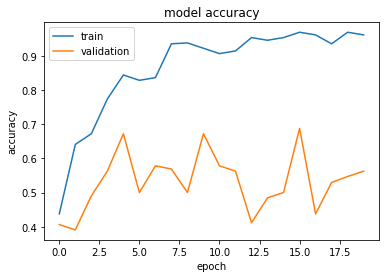

In [25]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

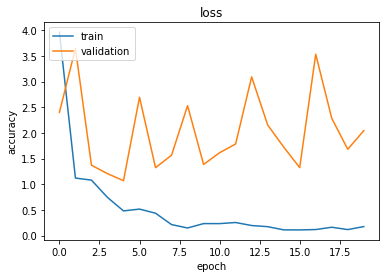

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
print(model.predict_classes)

<bound method Sequential.predict_classes of <keras.engine.sequential.Sequential object at 0x000001EB9D653978>>


In [29]:
test_index = np.random.rand(len(val_set)) < 0.5
test_set = val_set[test_index].copy()
test_generator =  train_gen.flow_from_dataframe(test_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              class_mode="categorical",  
                              batch_size=batch_size, shuffle=True)

Found 154 images belonging to 7 classes.


In [ ]:
test_label = []
for i in range(1):
    image, label = next(test_generator)
    print(label)
    

In [30]:
prediction = model.predict_generator(test_generator,steps=len(test_set)/batch_size,verbose=0)

In [31]:
test_generator.class_indices

{'An': 0, 'Con': 1, 'Di': 2, 'Fe': 3, 'Ha': 4, 'Sa': 5, 'Sur': 6}

In [35]:
y_true = np.array(test_generator.classes) + 1
y_true_label = []
for i in y_true:
    y_true_label.append(emotions_dict[i])
y_pred = np.argmax(prediction,axis=1)
y_pred = y_pred+1
y_pred_label = []
for i in y_pred:
    y_pred_label.append(emotions_dict[i])


In [36]:
y_pred = np.argmax(prediction,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Confusion Matrix
[[ 0  0  0  0 14  0  4]
 [ 0  0  0  1  5  0  3]
 [ 0  0  0  1 16  0  7]
 [ 0  0  0  0 10  0  2]
 [ 2  0  0  1 24  0  5]
 [ 0  0  0  0 14  0  5]
 [ 1  2  3  2 24  0  8]]
